In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import glob

from XMA_finder import XMA_finder
from Cluster_CDF_conv import Cluster_cdf_conv
#from histo_plot_lower_vmax import histo_plot
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

#import modules
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
import matplotlib.colors as colors
from merka05_surface_eq_array_GIPM import merka05_surface_eq_array_GIPM
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker

In [2]:
#import relevant raw ts
#Eastwood Intervals: 2001-04-23 03:52:00 (Pristine)
#2001-04-23 05:10:00

intervals_df = Cluster_cdf_conv('/Users/apx059/Documents/Full_CDFs/C1_CP_FGM_FULL__20010422_224000_20010423_210600_V140306.cdf', 'C1')

In [3]:
#read in Fourier Spectra

filepath_sw = '/Users/apx059/Documents/Spectra_2001/FS_2001-04-23 03:52:00_C1.csv'
filepath_fs = '/Users/apx059/Documents/Spectra_2001/FS_2001-04-23 05:08:00_C1.csv'

sw_fs_df = pd.read_csv(filepath_sw)
fs_fs_df = pd.read_csv(filepath_fs)

In [4]:
fs_fs_df

,Unnamed: 0,Freq,Parallel Power,Perp 1 Power,Perp 2 Power
0,0,0.000000,0.950125,7.191477,2.385879
1,1,0.004162,0.794139,0.769087,10.568359
2,2,0.008324,0.413614,53.307935,19.303722
3,3,0.012486,0.989364,74.455314,24.969333
4,4,0.016648,18.279341,56.010898,80.033712
...,...,...,...,...,...
2687,2687,11.183352,0.000095,0.000027,0.000005
2688,2688,11.187514,0.000010,0.000007,0.000006
2689,2689,11.191676,0.000013,0.000030,0.000007
2690,2690,11.195838,0.000019,0.000043,0.000049


In [5]:
intervals_df

,Bx_gse,By_gse,Bz_gse,B_mag,X_gse,Y_gse,Z_gse,R_GSE
datetime,,,,,,,,
2001-04-22 22:40:00.005,0.496,3.429000,-8.769000,9.429000,12.264355,-15.184681,1.352582,19.565744
2001-04-22 22:40:00.049,0.513,3.430000,-8.790000,9.450000,12.264355,-15.184681,1.352566,19.565744
2001-04-22 22:40:00.094,0.515,3.389000,-8.766000,9.412000,12.264355,-15.184681,1.352566,19.565744
2001-04-22 22:40:00.139,0.515,3.399000,-8.778000,9.427000,12.264355,-15.184697,1.352551,19.565756
2001-04-22 22:40:00.183,0.486,3.414000,-8.772000,9.426000,12.264355,-15.184697,1.352551,19.565756
...,...,...,...,...,...,...,...,...
2001-04-23 21:05:59.814,2.128,-51.161999,-68.640999,85.637001,0.211427,-5.151515,-7.376848,9.000039
2001-04-23 21:05:59.858,2.139,-51.169998,-68.651001,85.650002,0.211411,-5.151499,-7.376832,9.000016
2001-04-23 21:05:59.903,2.072,-51.188999,-68.624001,85.639000,0.211395,-5.151484,-7.376832,9.000008


In [6]:
fs_int_start = pd.to_datetime('2001-04-23 05:08:00')
fs_int_end = pd.to_datetime('2001-04-23 05:12:00')

sw_int_start = pd.to_datetime('2001-04-23 03:52:00')
sw_int_end = pd.to_datetime('2001-04-23 03:56:00')

In [7]:
sw_df = intervals_df.loc[(intervals_df.index > sw_int_start) & (intervals_df.index < sw_int_end)]
fs_df = intervals_df.loc[(intervals_df.index > fs_int_start) & (intervals_df.index < fs_int_end)]

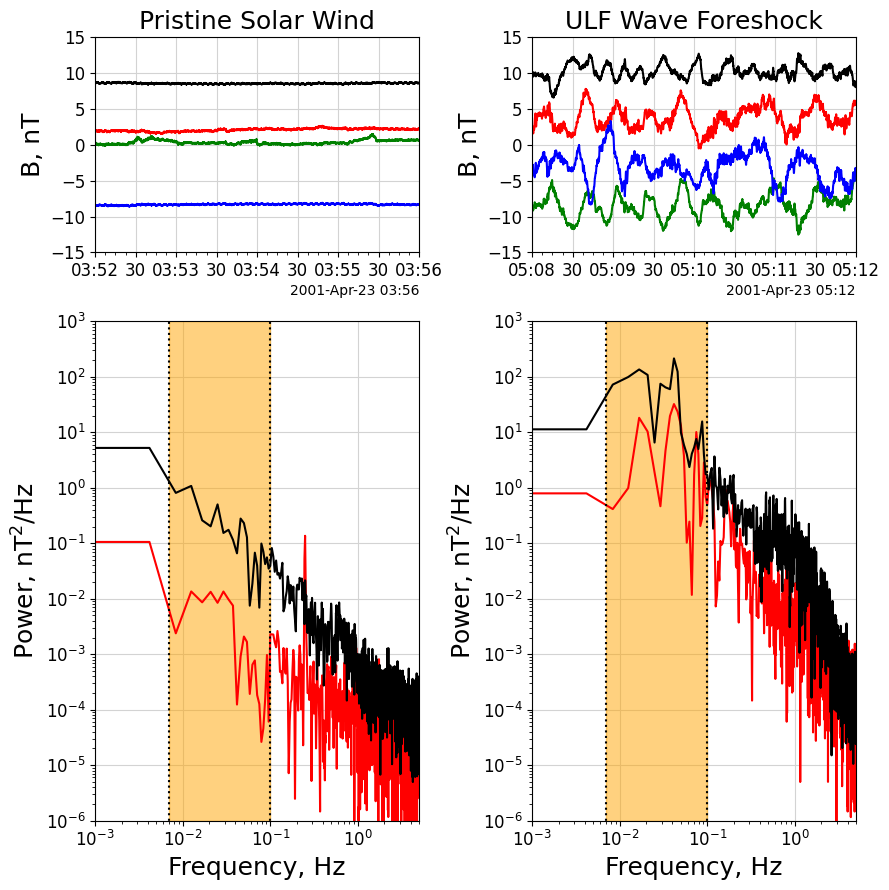

In [9]:
# Create a figure
fig = plt.figure(figsize=(9, 9))

locator = mdates.AutoDateLocator(minticks=3, maxticks=5)
formatter = mdates.ConciseDateFormatter(locator)

# Define a gridspec layout
gs = GridSpec(3, 2, figure=fig)

# Add subplots with custom spans
#Subplots are positioned and sized using slicing 
#(e.g., gs[0, 0:2] spans the first two columns of the first row).
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1:, 0])
ax4 = fig.add_subplot(gs[1:, 1])

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18

# Add data to each subplot
ax1.plot(sw_df.index, sw_df['Bx_gse'], color = 'red')
ax1.plot(sw_df.index, sw_df['By_gse'], color = 'green')
ax1.plot(sw_df.index, sw_df['Bz_gse'], color = 'blue')
ax1.plot(sw_df.index, sw_df['B_mag'], color = 'k')
ax1.set_ylim(-15, 15)
ax1.set_xlim(sw_int_start, sw_int_end)
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_ylabel(r'B, nT')
ax1.set_title('Pristine Solar Wind')
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='lightgray')
ax1.xaxis.grid(color='lightgray')

ax2.plot(fs_df.index, fs_df['Bx_gse'], color = 'red')
ax2.plot(fs_df.index, fs_df['By_gse'], color = 'green')
ax2.plot(fs_df.index, fs_df['Bz_gse'], color = 'blue')
ax2.plot(fs_df.index, fs_df['B_mag'], color = 'k')
ax2.set_ylim(-15, 15)
ax2.set_xlim(fs_int_start, fs_int_end)
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax2.set_ylabel(r'B, nT')
ax2.set_title('ULF Wave Foreshock')
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='lightgray')
ax2.xaxis.grid(color='lightgray')

int_lower_lim = 7*(10**(-3))
int_upper_lim = 100*(10**(-3))

sw_perp_tot = sw_fs_df['Perp 1 Power'] + sw_fs_df['Perp 2 Power']

ax3.plot(sw_fs_df['Freq'], sw_fs_df['Parallel Power'], color="red", label='Parallel Power')
ax3.plot(sw_fs_df['Freq'], sw_perp_tot, color="black", label='Perpendicular Power')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel(r'Power, $\mathrm{nT^2/Hz}$')
ax3.set_xlabel('Frequency, Hz')
ax3.set_xlim(0.001, 5)
ax3.set_ylim(0.000001, 1000)
ax3.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax3.vlines(x=int_lower_lim, ymin = 0.0000001, ymax = 10000, linestyles='dotted', color='k', label='Lower Bound')
ax3.vlines(x=int_upper_lim, ymin = 0.0000001, ymax = 10000, linestyles='dotted', color='k', label='Upper Bound')
ax3.axvspan(int_lower_lim, int_upper_lim, color='orange', alpha=0.5)
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)
ax3.set_axisbelow(True)
ax3.yaxis.grid(color='lightgray')
ax3.xaxis.grid(color='lightgray')

fs_perp_tot = fs_fs_df['Perp 1 Power'] + fs_fs_df['Perp 2 Power']

ax4.plot(fs_fs_df['Freq'], fs_fs_df['Parallel Power'], color="red", label='Parallel Power')
ax4.plot(fs_fs_df['Freq'], fs_perp_tot, color="black", label='Perpendicular Power')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_ylabel(r'Power, $\mathrm{nT^2/Hz}$')
ax4.set_xlabel('Frequency, Hz')
ax4.set_xlim(0.001, 5)
ax4.set_ylim(0.000001, 1000)
ax4.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax4.vlines(x=int_lower_lim, ymin = 0.0000001, ymax = 10000, linestyles='dotted', color='k', label='Lower Bound')
ax4.vlines(x=int_upper_lim, ymin = 0.0000001, ymax = 10000, linestyles='dotted', color='k', label='Upper Bound')
ax4.axvspan(int_lower_lim, int_upper_lim, color='orange', alpha=0.5)
ax4.xaxis.set_tick_params(labelsize=12)
ax4.yaxis.set_tick_params(labelsize=12)

ax4.set_axisbelow(True)
ax4.yaxis.grid(color='lightgray')
ax4.xaxis.grid(color='lightgray')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()